# SIR Model

## Assumptions
Homogenous mixing

Immunity after infection 

Same parameter values, and "static" policy 

## Setting Up

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Set Input Parameters

In [2]:
### Parameters to Vary ###

# lambda: number of people that a susceptible person interacts with per time step
# p: probability of getting infected if a susceptible person interacts with an infectious person
# gamma: recovery rate (recovery probability within one time step)
lam, p, gamma = 3, 0.05, 1./14 # set lam = 2 vs 20, p = 0.3, gamma = 1/14

# probability of getting infected every time step
#beta = 1 - pow(1-p,lam)
beta = min(1, lam * p) # beta <= 1 by definition


In [3]:
### Fixed Parameters ###

# Total population.
N_total = 300000000

# Some vaccinated people are immune
N = N_total

# A grid of time points (in days) for the detecting period
t = np.linspace(0, 365, 366)

# Initial number of infected and immune individuals, I0 and R0.
I0, R0 = 10, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0

## Model Engine

In [4]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Defining derivatives, three equations - describe rate of change
y = current state of the system (S,I,R)
t = 
N
beta = new infections
gamma = recovery rate

given current state of system, we can tell you the rate of change for all three stages

describing system dynamics between the stages, 


## Generate Trajectories for S(t), I(t), R(t)

In [5]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Here outputs S,I,R are trajectories over the simulation time horizon, 
# i.e., S is a vector of the numbers of susceptible people at each time step, check by printing it out:
#print S


sytem dynamics -- run for 366 days with the derivitive functon
odeint() - given boundary condition, and how things change over time, 
play out entire system over time 

S,I,R - vectors, trajectory of numbers (susceptible in time 1,2,3,4,...etc)

## Plot Trajectories for S(t), I(t), R(t)

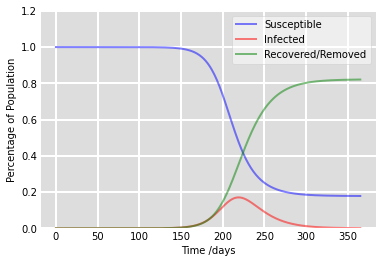

In [6]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N_total, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N_total, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N_total, 'g', alpha=0.5, lw=2, label='Recovered/Removed')
ax.set_xlabel('Time /days')
ax.set_ylabel('Percentage of Population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()